In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv('../data/cleaned_metu_ring.csv')

In [4]:
df.head()

,Gender,Residence,Study_Level,Faculty,Grad_School,Visiting_Faculty_GradSchool,Affiliation_Program,Freq_Taxi,Freq_Ring,Freq_Walking,...,Problem_NotClean,Problem_DriverBehavior,Understanding_Routes,Avg_Wait_Time,UseMore_IfFrequent,App_Helping_Ring,MostValuable_Improvement,Overall_Satisfaction,Open_Comments,Department
0,Male,"East Dorms (1st Dorm, 2nd Dorm, 16th Guesthous...",Undergraduate (Bachelor’s),Faculty of Engineering,NaN,NaN,NaN,Rarely,Sometimes,Always,...,Often,Always,1.0,11–15 minutes,Yes,5.0,Better route coverage,2.0,The buses should have a much better indication...,Electrical and Electronics Engineering
1,Female,"West Dorms (Isa Demiray Student Dormitory, 19t...",Undergraduate (Bachelor’s),Faculty of Arts and Sciences,NaN,NaN,NaN,Rarely,Often,Sometimes,...,Sometimes,Never,3.0,11–15 minutes,Yes,5.0,More frequent buses,4.0,NaN,Psychology
2,Female,"West Dorms (Isa Demiray Student Dormitory, 19t...",Undergraduate (Bachelor’s),Faculty of Engineering,NaN,NaN,NaN,Rarely,Always,Always,...,Often,Never,5.0,11–15 minutes,Yes,5.0,Better route coverage,3.0,NaN,Computer Engineering
3,Male,"West Dorms (Isa Demiray Student Dormitory, 19t...",Undergraduate (Bachelor’s),Faculty of Engineering,NaN,NaN,NaN,Rarely,Always,Always,...,Never,Never,5.0,5–10 minutes,Yes,2.0,Better route coverage,3.0,The weekday evening busses’ route is overlappi...,Civil Engineering
4,Male,Off-campus (within walking distance),Undergraduate (Bachelor’s),Faculty of Economic and Administrative Sciences,NaN,NaN,NaN,Often,Sometimes,Often,...,Never,Never,2.0,11–15 minutes,Yes,4.0,Better real-time tracking,4.0,NaN,International Relations


In [6]:
satisfaction_cols = [
    'Overall_Satisfaction',
    'Weekday_Schedule_Satisfaction', 
    'Weekend_Schedule_Satisfaction',
    'App_Helping_Ring',
    'Understanding_Routes'
]

In [7]:
for col in satisfaction_cols:
    if col in df.columns:
        print(f"{col}: {df[col].value_counts()}")
    else:
        print(f"{col} not found in DataFrame")

Overall_Satisfaction: Overall_Satisfaction
3.0    166
2.0     68
4.0     68
1.0     15
5.0      8
Name: count, dtype: int64
Weekday_Schedule_Satisfaction: Weekday_Schedule_Satisfaction
3    105
2     94
4     78
1     44
5      4
Name: count, dtype: int64
Weekend_Schedule_Satisfaction: Weekend_Schedule_Satisfaction
1    126
2    114
3     69
4     14
5      2
Name: count, dtype: int64
App_Helping_Ring: App_Helping_Ring
4.0    81
3.0    67
5.0    64
1.0    58
2.0    55
Name: count, dtype: int64
Understanding_Routes: Understanding_Routes
3.0    99
4.0    92
2.0    57
5.0    45
1.0    32
Name: count, dtype: int64


In [9]:
# Distribution for each satisfaction variable
for col in ['Overall_Satisfaction', 'Weekday_Schedule_Satisfaction', 'Weekend_Schedule_Satisfaction']:
    if col in df.columns:
        dist = df[col].value_counts(normalize=True, dropna=True) * 100
        print(f"\n{col} Distribution (%):")
        for val in [1, 2, 3, 4, 5]:
            pct = dist.get(val, 0)
            print(f"  {val}: {pct:.1f}%")


Overall_Satisfaction Distribution (%):
  1: 4.6%
  2: 20.9%
  3: 51.1%
  4: 20.9%
  5: 2.5%

Weekday_Schedule_Satisfaction Distribution (%):
  1: 13.5%
  2: 28.9%
  3: 32.3%
  4: 24.0%
  5: 1.2%

Weekend_Schedule_Satisfaction Distribution (%):
  1: 38.8%
  2: 35.1%
  3: 21.2%
  4: 4.3%
  5: 0.6%


- **Overall satisfaction is neutral**: 51.1% are neutral (3), with roughly equal proportions dissatisfied (25.5%) and satisfied (23.4%), indicating mixed overall sentiment.

- **Weekday schedules show moderate dissatisfaction**: 42.4% are dissatisfied (1–2) versus 25.2% satisfied (4–5), with neutral (32.3%) as the largest single category, suggesting weekday schedules need improvement.

- **Weekend schedules show strong dissatisfaction**: 73.9% are dissatisfied (1–2), with only 4.9% satisfied (4–5), indicating weekend schedules are a major concern.

- **Dissatisfaction increases from overall → weekday → weekend**: Dissatisfied proportions rise from 25.5% (overall) to 42.4% (weekday) to 73.9% (weekend), showing schedule-specific issues drive dissatisfaction.

- **Weekend schedules are the top priority**: Nearly three-quarters of respondents are dissatisfied with weekend schedules, making this the most urgent area for service improvement.

In [10]:
# Mean and median for satisfaction variables
satisfaction_summary = pd.DataFrame({
    'Mean': df[['Overall_Satisfaction', 'Weekday_Schedule_Satisfaction', 'Weekend_Schedule_Satisfaction']].mean(),
    'Median': df[['Overall_Satisfaction', 'Weekday_Schedule_Satisfaction', 'Weekend_Schedule_Satisfaction']].median(),
    'Std': df[['Overall_Satisfaction', 'Weekday_Schedule_Satisfaction', 'Weekend_Schedule_Satisfaction']].std(),
    'N': df[['Overall_Satisfaction', 'Weekday_Schedule_Satisfaction', 'Weekend_Schedule_Satisfaction']].count()
})

In [11]:
satisfaction_summary

,Mean,Median,Std,N
Overall_Satisfaction,2.956923,3.0,0.837760,325
Weekday_Schedule_Satisfaction,2.704615,3.0,1.017809,325
Weekend_Schedule_Satisfaction,1.929231,2.0,0.908418,325


- **Overall satisfaction is near-neutral**: Mean of 2.96 (median 3.0) on a 1–5 scale, indicating neutral overall sentiment with low variability (SD = 0.84).

- **Weekday schedule satisfaction is below neutral**: Mean of 2.70 (median 3.0) with the highest variability (SD = 1.02), indicating mixed opinions about weekday schedules.

- **Weekend schedule satisfaction is low**: Mean of 1.93 (median 2.0), well below neutral, indicating dissatisfaction with weekend schedules.

- **Satisfaction decreases from overall → weekday → weekend**: Means decline from 2.96 → 2.70 → 1.93, showing schedule-specific issues drive lower satisfaction.

- **Complete data across all measures**: All three satisfaction measures have N = 325, indicating no missing data and consistent sample size for comparisons.

In [13]:
for col in ['Overall_Satisfaction', 'Weekday_Schedule_Satisfaction', 'Weekend_Schedule_Satisfaction']:
    if col in df.columns:
        data = df[col].dropna()
        n = len(data)
        mean = data.mean()
        se = data.std() / np.sqrt(n)
        ci_lower, ci_upper = stats.t.interval(0.95, n-1, loc=mean, scale=se)
        print(f"\n{col}:")
        print(f"  Mean: {mean:.2f}")
        print(f"  SE: {se:.3f}")
        print(f"  95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]")


Overall_Satisfaction:
  Mean: 2.96
  SE: 0.046
  95% CI: [2.87, 3.05]

Weekday_Schedule_Satisfaction:
  Mean: 2.70
  SE: 0.056
  95% CI: [2.59, 2.82]

Weekend_Schedule_Satisfaction:
  Mean: 1.93
  SE: 0.050
  95% CI: [1.83, 2.03]


- **Overall satisfaction is precisely estimated near neutral**: Mean of 2.96 with a narrow 95% CI [2.87, 3.05] and low SE (0.046), indicating the estimate is stable and the true mean likely falls near neutral (3.0).

- **Weekday schedule satisfaction is below neutral with good precision**: Mean of 2.70 with 95% CI [2.59, 2.82] and SE of 0.056, indicating reliable evidence that weekday satisfaction is below the neutral point.

- **Weekend schedule satisfaction is low with precise estimation**: Mean of 1.93 with 95% CI [1.83, 2.03] and SE of 0.050, providing strong evidence that weekend satisfaction is well below neutral.

- **All estimates have similar precision**: Standard errors range from 0.046 to 0.056, indicating consistent precision across all three satisfaction measures despite different variability levels.

- **Confidence intervals do not overlap**: The CIs for overall (2.87–3.05), weekday (2.59–2.82), and weekend (1.83–2.03) are distinct, providing statistical evidence that satisfaction significantly decreases from overall → weekday → weekend.

In [14]:
weekday_mean = df['Weekday_Schedule_Satisfaction'].mean()
weekend_mean = df['Weekend_Schedule_Satisfaction'].mean()
difference = weekday_mean - weekend_mean

In [15]:
print(f"Weekday Mean: {weekday_mean:.2f}")
print(f"Weekend Mean: {weekend_mean:.2f}")
print(f"Difference: {difference:.2f}")

Weekday Mean: 2.70
Weekend Mean: 1.93
Difference: 0.78


In [16]:
paired_data = df[['Weekday_Schedule_Satisfaction', 'Weekend_Schedule_Satisfaction']].dropna()

weekday_scores = paired_data['Weekday_Schedule_Satisfaction']
weekend_scores = paired_data['Weekend_Schedule_Satisfaction']

# Perform paired t-test
t_stat, p_value = stats.ttest_rel(weekday_scores, weekend_scores)

In [17]:
differences = weekday_scores - weekend_scores
cohens_d = differences.mean() / differences.std()

In [19]:
print(f"\n{'='*60}")
print("PAIRED SAMPLES T-TEST: Weekday vs Weekend Satisfaction")
print(f"{'='*60}")
print(f"Sample size (paired): {len(paired_data)}")
print(f"\nWeekday Mean: {weekday_mean:.2f}")
print(f"Weekend Mean: {weekend_mean:.2f}")
print(f"Mean Difference: {difference:.2f}")
print(f"\nT-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.10f}")
print(f"Cohen's d (effect size): {cohens_d:.3f}")


PAIRED SAMPLES T-TEST: Weekday vs Weekend Satisfaction
Sample size (paired): 325

Weekday Mean: 2.70
Weekend Mean: 1.93
Mean Difference: 0.78

T-statistic: 12.863
P-value: 0.0000000000
Cohen's d (effect size): 0.714


- **Statistically significant difference**: P-value < 0.001 (t = 12.863) indicates a significant difference between weekday (M = 2.70) and weekend (M = 1.93) satisfaction, with weekday satisfaction higher.

- **Substantial mean difference**: A difference of 0.78 points on a 1–5 scale represents a meaningful gap, with weekday satisfaction notably higher than weekend satisfaction.

- **Medium-to-large effect size**: Cohen's d = 0.714 indicates a medium-to-large effect, suggesting the difference is both statistically significant and practically meaningful.

- **Large, reliable sample**: N = 325 paired observations provides strong statistical power and reliable estimates for this comparison.

- **Strong evidence for weekend schedule issues**: The results provide strong evidence that weekend schedules are a major concern, with satisfaction significantly lower than weekday schedules.

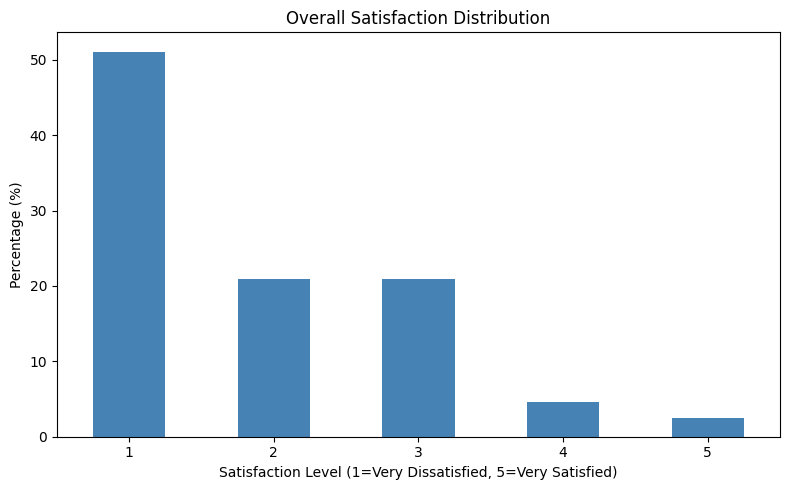

In [21]:
fig, ax = plt.subplots(figsize=(8, 5))
dist = df['Overall_Satisfaction'].value_counts(normalize=True, dropna=True) * 100
dist.plot(kind='bar', ax=ax, color='steelblue')
ax.set_xlabel('Satisfaction Level (1=Very Dissatisfied, 5=Very Satisfied)')
ax.set_ylabel('Percentage (%)')
ax.set_title('Overall Satisfaction Distribution')
ax.set_xticklabels([1, 2, 3, 4, 5], rotation=0)
plt.tight_layout()
plt.show()

- **Strong dissatisfaction dominates**: Approximately 51% of respondents report "Very Dissatisfied" (Level 1), indicating a major concern with overall satisfaction.

- **Low satisfaction across the scale**: Only 4.5% are "Satisfied" (Level 4) and 2.5% are "Very Satisfied" (Level 5), showing very few respondents are satisfied.

- **Bimodal pattern with negative skew**: The distribution shows high dissatisfaction (Level 1: 51%) and moderate dissatisfaction/neutral (Levels 2–3: ~21% each), with satisfaction levels (4–5) representing less than 7% combined.

- **Clear service improvement needed**: With over 70% of respondents in dissatisfied categories (Levels 1–2), the service requires significant improvements to address widespread dissatisfaction.

- **Distribution indicates systemic issues**: The concentration of responses in the lower satisfaction levels (1–2) suggests fundamental problems rather than isolated concerns, requiring comprehensive service redesign.

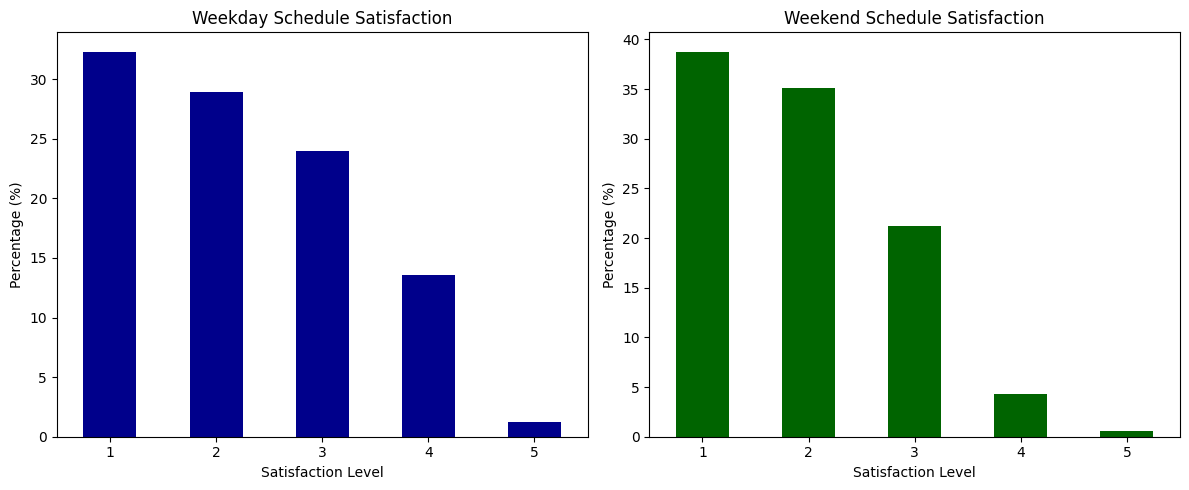

In [22]:
# Weekday vs Weekend comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Weekday distribution
weekday_dist = df['Weekday_Schedule_Satisfaction'].value_counts(normalize=True, dropna=True) * 100
weekday_dist.plot(kind='bar', ax=ax1, color='darkblue')
ax1.set_title('Weekday Schedule Satisfaction')
ax1.set_xlabel('Satisfaction Level')
ax1.set_ylabel('Percentage (%)')
ax1.set_xticklabels([1, 2, 3, 4, 5], rotation=0)

# Weekend distribution
weekend_dist = df['Weekend_Schedule_Satisfaction'].value_counts(normalize=True, dropna=True) * 100
weekend_dist.plot(kind='bar', ax=ax2, color='darkgreen')
ax2.set_title('Weekend Schedule Satisfaction')
ax2.set_xlabel('Satisfaction Level')
ax2.set_ylabel('Percentage (%)')
ax2.set_xticklabels([1, 2, 3, 4, 5], rotation=0)

plt.tight_layout()
plt.show()

- **Both show high dissatisfaction**: Weekday schedules have 61% dissatisfied (Levels 1–2), while weekend schedules have 74% dissatisfied, indicating schedule issues on both days.

- **Weekend dissatisfaction is higher**: Weekend dissatisfaction (74%) is 13 percentage points higher than weekday (61%), with "Very Dissatisfied" at 39% on weekends versus 32% on weekdays.

- **Weekday satisfaction is higher**: Weekday has 14% satisfied (Levels 4–5) compared to 5% on weekends, showing weekday schedules are better received.

- **Neutral responses are similar**: Both have similar neutral proportions (weekday 24%, weekend 21%), suggesting most respondents have clear opinions rather than being indifferent.

- **Weekend schedules need urgent attention**: With 74% dissatisfied and only 5% satisfied, weekend schedules require immediate redesign to address widespread dissatisfaction.

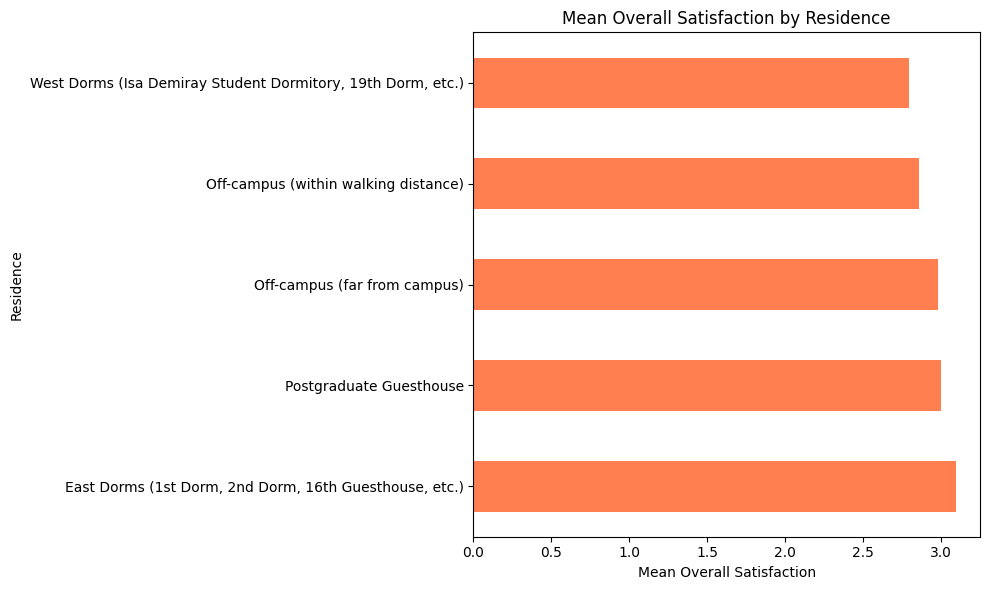

In [23]:
# Mean satisfaction by residence
residence_means = df.groupby('Residence')['Overall_Satisfaction'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
residence_means.plot(kind='barh', ax=ax, color='coral')
ax.set_xlabel('Mean Overall Satisfaction')
ax.set_title('Mean Overall Satisfaction by Residence')
ax.set_ylabel('Residence')
plt.tight_layout()
plt.show()

- **East Dorms show highest satisfaction**: Mean overall satisfaction of approximately 3.1, slightly above neutral, indicating East Dorms residents are the most satisfied group.

- **West Dorms show lowest satisfaction**: Mean overall satisfaction of approximately 2.8, below neutral, indicating West Dorms residents are the least satisfied group and may need targeted improvements.

- **Limited variation across residence types**: All residence categories fall within a narrow range (2.8–3.1), suggesting satisfaction differences by residence are modest rather than dramatic.

- **Most groups are near neutral**: Off-campus (far) and Postgraduate Guesthouse residents report mean satisfaction around 3.0–3.05, indicating neutral sentiment across most residence types.

- **Residence location has modest impact**: The 0.3-point difference between highest (East Dorms: 3.1) and lowest (West Dorms: 2.8) suggests residence location influences satisfaction but is not the primary driver of overall satisfaction levels.

In [25]:
usage_map = {
    'Never': 'Never/Rarely',
    'Rarely': 'Never/Rarely', 
    'Sometimes': 'Sometimes',
    'Often': 'Often/Always',
    'Always': 'Often/Always'
}


In [26]:
df['Usage_Category'] = df['Freq_Ring'].map(usage_map)


In [27]:
usage_satisfaction = df.groupby('Usage_Category').agg({
    'Overall_Satisfaction': 'mean',
    'Weekday_Schedule_Satisfaction': 'mean',
    'Weekend_Schedule_Satisfaction': 'mean'
}).round(2)

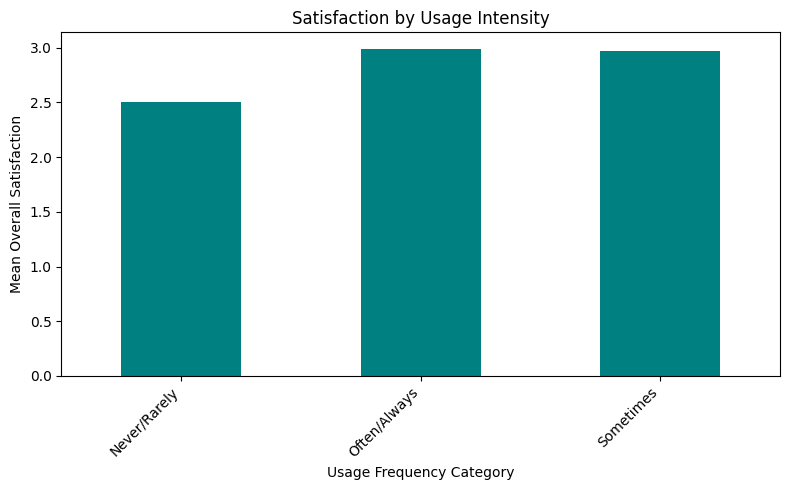

In [28]:
usage_means = df.groupby('Usage_Category')['Overall_Satisfaction'].mean()

fig, ax = plt.subplots(figsize=(8, 5))
usage_means.plot(kind='bar', ax=ax, color='teal')
ax.set_xlabel('Usage Frequency Category')
ax.set_ylabel('Mean Overall Satisfaction')
ax.set_title('Satisfaction by Usage Intensity')
ax.set_xticklabels(usage_means.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

- **Higher usage correlates with higher satisfaction**: "Often/Always" and "Sometimes" users both report mean satisfaction of 3.0 (neutral), while "Never/Rarely" users report 2.5 (below neutral), suggesting usage frequency is positively associated with satisfaction.

- **Infrequent users show lower satisfaction**: "Never/Rarely" users have the lowest satisfaction (2.5), which may reflect either dissatisfaction preventing usage or lack of usage leading to lower satisfaction.

- **Regular users reach neutral satisfaction**: Both "Often/Always" and "Sometimes" users achieve neutral satisfaction (3.0), indicating the service meets the needs of those who use it regularly.

- **Usage-satisfaction relationship is positive**: The pattern suggests that increased usage is associated with better satisfaction, possibly because regular users benefit more from the service or have adapted to its features.

- **Service works for active users**: The fact that frequent and occasional users both report neutral satisfaction (3.0) suggests the service functions adequately for those who engage with it regularly, while non-users or rare users may need different approaches to improve their experience.